# PROPERTIES
- Centroid/ Center of mass
- Area
- Perimeter
- Bounding Boxes
- Rotated bounding boxes
- Minimum enclosing circles
- Fitting an ellipse

In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import cv2
from cv_imshow import create_subplot, display_image, show_image
import imutils

In [5]:
args = {
    "image" : "../../images/more_shapes.png"
}

In [6]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#find external contours of image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone = image.copy()

## Centroid/Center of Mass
- Calculated based on image moments, which are based on weighted average of (x,y) coordinates/pixel intensity along the contour.
- Moments allows us to use basic statistics to represent the structure and shape of object in image.
- Centroid calculation: Mean position of all coordinates along the contour of the shape.

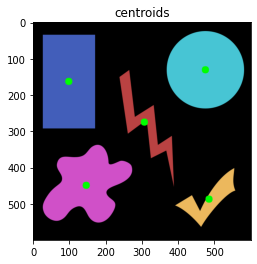

In [7]:
for c in cnts:
    #compute moments of contours
    M = cv2.moments(c)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.circle(clone, (cx, cy), 10, (0,255,0), -1)
display_image("centroids", clone)
clone = image.copy()

## AREA AND PERIMETER
- The area of contour is the number of pixels that reside within the contour.
- Perimeter is the length of the contour.

Contour #1 -- area: 8049.50, perimeter: 577.39
Contour #2 -- area: 30873.00, perimeter: 893.32
Contour #3 -- area: 10435.50, perimeter: 1038.54
Contour #4 -- area: 36751.00, perimeter: 800.00
Contour #5 -- area: 35702.00, perimeter: 705.07


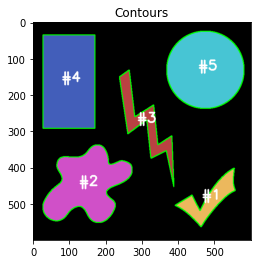

In [11]:
for (i,c) in enumerate(cnts):
    # computer area and perimeter
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i+1, area, perimeter))
    
    # draw contour
    cv2.drawContours(clone, [c], -1, (0,255,0), 2)
    
    # compute center of contour and draw the number
    M = cv2.moments(c)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.putText(clone, "#{}".format(i+1), (cx-20, cy), cv2.FONT_HERSHEY_SIMPLEX,
               1.25, (255,255,255), 4)
display_image("Contours", clone)

## BOUNDING BOXES
- An upright rectange that bounds and contains the entire contoured region of the image. Does not consider rotation of shape. 
- Contains four co-ordinates, (x,y) which is top left coordinates and (h,w) which is height and width of the box

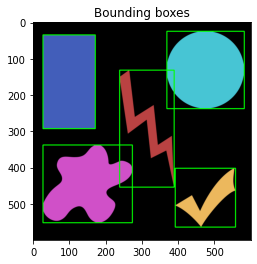

In [12]:
clone = image.copy()

for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(clone, (x,y), (x+w, y+h), (0,255,0), 2)
display_image("Bounding boxes", clone)

## ROTATED BOUNDING BOXES
- We should also consider rotation of bounding box.

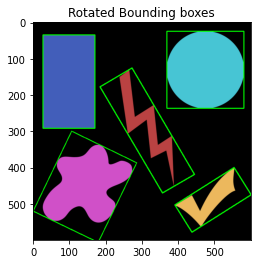

In [13]:
clone = image.copy()
for c in cnts:
    # box = (x,y,w,h,theta) where theta is rotation of shape
    box = cv2.minAreaRect(c)
    # boxPoints converts the box tuple to set of coordinate points
    box = np.int0(cv2.boxPoints(box)) 
    # cv2.minAreaRect just gives another contour, thus we drawContour
    cv2.drawContours(clone, [box], -1, (0,255,0),2)
display_image("Rotated Bounding boxes", clone)

## MINIMUM ENCLOSING CIRCLES
- cv2.minEnclosingCircle: takes our contour and returns the (x, y)-coordinates of the center of circle along with the radius of the circle.

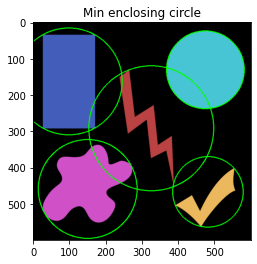

In [14]:
clone = image.copy()
for c in cnts:
    ((x,y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone, (int(x), int(y)), int(radius), (0,255,0), 2)
display_image("Min enclosing circle", clone)

## FITTING AN ELLIPSE
- OpenCV is computing the rotated rectangle of the contour. And then it’s taking the rotated rectangle and computing an ellipse to fit in the rotated region
- Since a rectangle only has 4 points, we cannot fit an ellipse to it, but for all other shapes, we have > 5 points so this is not a concern.

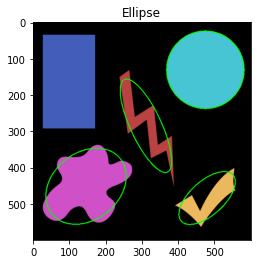

In [16]:
clone = image.copy()
for c in cnts:
    if len(c) >= 5:
        ellipse = cv2.fitEllipse(c)
        cv2.ellipse(clone, ellipse, (0,255,0), 2)
display_image("Ellipse", clone)